# Exploratory Data Analysis: FIFA World Cup 2018







![](https://www.myuganda.co.ug/wp-content/uploads/2018/06/2018-Fifa-Worldcup-in-Russia.jpg)

Importing the required packages.

In [51]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

### A Look At The Dataset
    

In [52]:
data_file = pd.read_csv('FIFA 2018 Statistics.csv')

# Creating a new Feature 'Result' to depict whether the match was a {'Win':1, 'Draw':0, 'Loss':-1} 
data_file['Result']=np.nan
for i in range(0,128,2):
    a_goals=data_file.iloc[i]['Goal Scored']
    b_goals=data_file.iloc[i+1]['Goal Scored']
    if a_goals>b_goals:
        data_file.iloc[i,-1]=1
        data_file.iloc[i+1,-1]=-1
    elif b_goals>a_goals:
        data_file.iloc[i,-1]=-1
        data_file.iloc[i+1,-1]=1
    else:
        data_file.iloc[i,-1]=0
        data_file.iloc[i+1,-1]=0
        
#Changing the categorical feature 'Man of the Match' :'Yes', 'No' to 1, 0
data_file.rename(columns={'Man of the Match':'MoM'},inplace=True)
data_file.MoM = data_file.MoM.replace(['Yes','No'],[1,0])

data_file.head()  #displays the first 5 rows of the dataset

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow & Red,Red,MoM,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time,Result
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,1,12.0,Group Stage,No,0,NaN,NaN,1.0
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,NaN,Group Stage,No,0,NaN,NaN,-1.0
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,0,0,0,NaN,Group Stage,No,0,NaN,NaN,-1.0
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,1,89.0,Group Stage,No,0,NaN,NaN,1.0
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,0,0,0,NaN,Group Stage,No,0,1.0,90.0,-1.0


In [53]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 28 columns):
Date                      128 non-null object
Team                      128 non-null object
Opponent                  128 non-null object
Goal Scored               128 non-null int64
Ball Possession %         128 non-null int64
Attempts                  128 non-null int64
On-Target                 128 non-null int64
Off-Target                128 non-null int64
Blocked                   128 non-null int64
Corners                   128 non-null int64
Offsides                  128 non-null int64
Free Kicks                128 non-null int64
Saves                     128 non-null int64
Pass Accuracy %           128 non-null int64
Passes                    128 non-null int64
Distance Covered (Kms)    128 non-null int64
Fouls Committed           128 non-null int64
Yellow Card               128 non-null int64
Yellow & Red              128 non-null int64
Red                       128 non-nul

In [54]:
missing_df = pd.DataFrame()
missing_df['Feature'] = data_file.isnull().sum().sort_values(ascending = False).index
missing_df['Count of Missing Values'] = data_file.isnull().sum().sort_values(ascending = False).values
missing_df['Percentage of Missing Values'] = missing_df['Count of Missing Values']*100 / len(data_file)
missing_df

,Feature,Count of Missing Values,Percentage of Missing Values
0,Own goals,116,90.6250
1,Own goal Time,116,90.6250
2,1st Goal,34,26.5625
3,Result,0,0.0000
4,Free Kicks,0,0.0000
5,Team,0,0.0000
6,Opponent,0,0.0000
7,Goal Scored,0,0.0000
8,Ball Possession %,0,0.0000
9,Attempts,0,0.0000


In [55]:
data_file['Own goals'].fillna(0, inplace = True)
data_file['Own goal Time'].fillna(0, inplace = True)
data_file['1st Goal'].fillna(0, inplace = True)

#### **Understanding the Features**

1. **Date**: Match Date.
2. **Team**: Playing Team.
3. **Opponent**: Opponent Team.
4. **Goal Scored**: Number of goals scored by playing team.
5. **Ball Possession %**: Amount of time the ball was in control of the playing team.
6. **Attempts**: Number of attempts to score a goal.
7. **On-Target**: Number of shots that were on-target.
8. **Off-Target**: Number of shots that were off-target.
9. **Blocked**: Number of opponent team's shots blocked.
10. **Corners**: Number of corner shots.
11. **Offsides**: Number of offside plays.
12. **Free Kicks**: Number of free kicks used.
13. **Saves**: Number of saves by the goal keeper.
14. **Pass Accuracy %**: Percentage of passes that reached the same team player as aimed.
15. **Passes**: Total number of passes by the team.
16. **Distance Covered(Kms)**: Total distance covered by the team members in this game.
17. **Fouls Committed**: Number of fouls committed by the team members.
18. **Yellow Card**: Number of Yellow warning received.
19. **Yellow & Red**: Number of Yellow & Red warning received.
20. **Red**: Number of Red cards received.
21. **Man of the Match**: Did this team member win Man of the Match?
22. **1st Goal**: When did the team score the 1st goal?
23. **Round**: Stage of the match
24. **PSO**: Was there a penalty shootout (PSO) in this match?
25. **Goals in PSO**: Number of goals scored in the Penalty shootout.
26. **Own goals**: Number of own goals.
27. **Own goal Time**: When did the team score own goal?

####  Detecting Any Outliers 

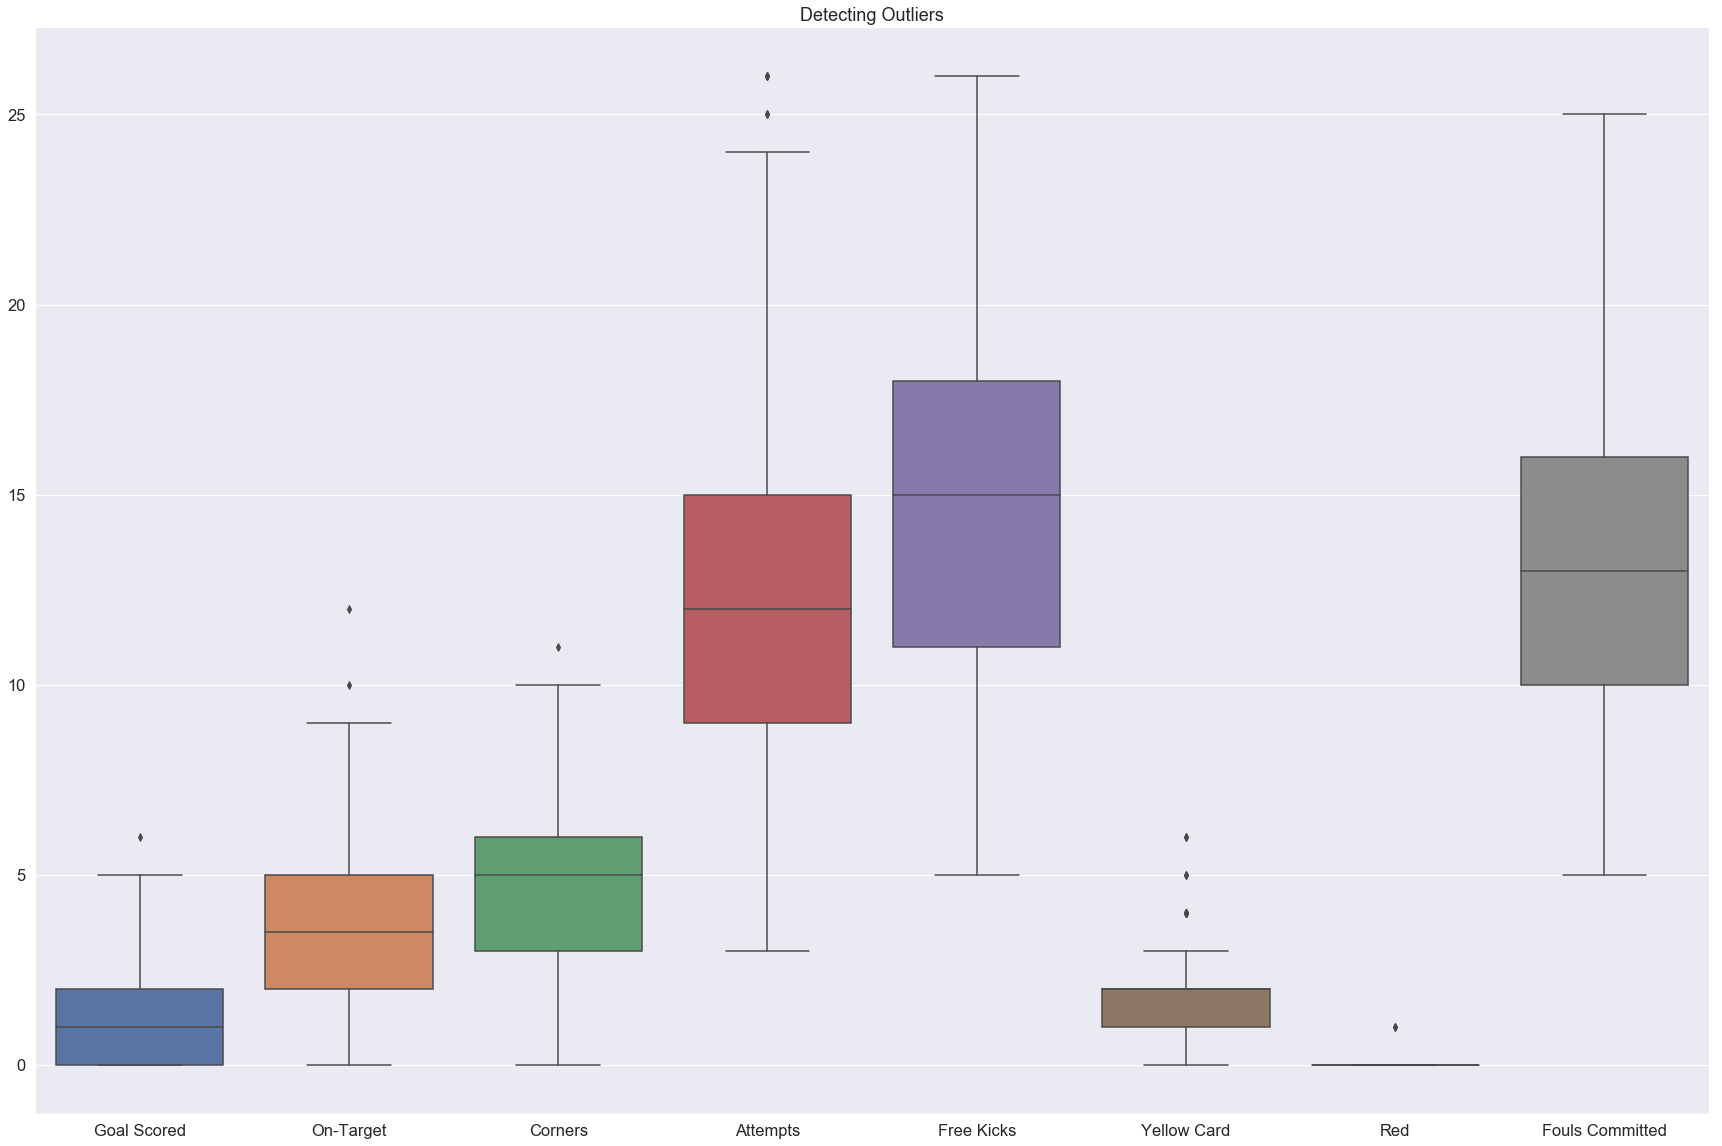

In [56]:
#Detecting Outliers
var1 = ['Goal Scored', 'On-Target', 'Corners', 'Attempts', 'Free Kicks', 'Yellow Card', 'Red', 'Fouls Committed']
dummy_data = data_file[var1]
plt.figure(figsize=(30,20))
sns.boxplot(data = dummy_data)
plt.title('Detecting Outliers')
plt.show()

In [57]:
def find_outliers(x):
    q1 = x.quantile(.25)
    q3 = x.quantile(.75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indices])
    #data = data[~((data < (Q1 - 1.5 * IQR)) |(boston_df_o1 > (Q3 + 1.5 * IQR))).any(axis=1)]
    #boston_df_out.shape
    return outlier_indices, outlier_values

In [58]:
num_cols = ['Goal Scored','Ball Possession %', 'Attempts', 'On-Target', 'Off-Target',
           'Blocked', 'Corners', 'Offsides', 'Free Kicks',
           'Saves', 'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)', 'Fouls Committed',
           'Yellow Card', 'Yellow & Red', 'Red', 'MoM', '1st Goal', 'Goals in PSO',
           'Own goals', 'Own goal Time', 'Result']

master_indices = []
for i in num_cols:
    indices, vals = find_outliers(data_file[i])
    master_indices.append(indices)
    print("Outliers for ", i)
    print("Total = ", len(vals))
    #data_file.drop(indices, inplace = True)
    print(np.sort(vals))

Outliers for  Goal Scored
Total =  1
[6]
Outliers for  Ball Possession %
Total =  0
[]
Outliers for  Attempts
Total =  5
[25 25 26 26 26]
Outliers for  On-Target
Total =  2
[10 12]
Outliers for  Off-Target
Total =  0
[]
Outliers for  Blocked
Total =  10
[ 8  8  8  8  9  9  9 10 10 10]
Outliers for  Corners
Total =  1
[11]
Outliers for  Offsides
Total =  0
[]
Outliers for  Free Kicks
Total =  0
[]
Outliers for  Saves
Total =  3
[9 9 9]
Outliers for  Pass Accuracy %
Total =  0
[]
Outliers for  Passes
Total =  1
[1137]
Outliers for  Distance Covered (Kms)
Total =  12
[ 80  83 132 135 136 137 139 143 143 146 148 148]
Outliers for  Fouls Committed
Total =  0
[]
Outliers for  Yellow Card
Total =  12
[4 4 4 4 4 4 4 4 5 5 6 6]
Outliers for  Yellow & Red
Total =  2
[1 1]
Outliers for  Red
Total =  2
[1 1]
Outliers for  MoM
Total =  0
[]
Outliers for  1st Goal
Total =  0
[]
Outliers for  Goals in PSO
Total =  8
[2 3 3 3 3 4 4 4]
Outliers for  Own goals
Total =  12
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

The outliers haven't been removed as the dataset is small.

#### **Summary of the dataset**

In [59]:
data_file.describe()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Fouls Committed,Yellow Card,Yellow & Red,Red,MoM,1st Goal,Goals in PSO,Own goals,Own goal Time,Result
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,1.320312,49.992188,12.593750,3.914062,5.273438,3.359375,4.718750,1.343750,14.890625,2.726562,...,13.546875,1.695312,0.015625,0.015625,0.500000,28.976562,0.203125,0.093750,4.296875,0.000000
std,1.156519,10.444074,5.245827,2.234403,2.409675,2.403195,2.446072,1.193404,4.724262,2.049447,...,4.619131,1.325454,0.124507,0.124507,0.501965,27.304196,0.807049,0.292626,16.053728,0.896186
min,0.000000,25.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,...,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,42.000000,9.000000,2.000000,4.000000,1.750000,3.000000,0.000000,11.000000,1.000000,...,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,1.000000,50.000000,12.000000,3.500000,5.000000,3.000000,5.000000,1.000000,15.000000,2.000000,...,13.000000,2.000000,0.000000,0.000000,0.500000,23.500000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,58.000000,15.000000,5.000000,7.000000,4.000000,6.000000,2.000000,18.000000,4.000000,...,16.000000,2.000000,0.000000,0.000000,1.000000,51.000000,0.000000,0.000000,0.000000,1.000000
max,6.000000,75.000000,26.000000,12.000000,11.000000,10.000000,11.000000,5.000000,26.000000,9.000000,...,25.000000,6.000000,1.000000,1.000000,1.000000,90.000000,4.000000,1.000000,90.000000,1.000000


### **Insights Into The Data**

#### **Univariate Analysis**

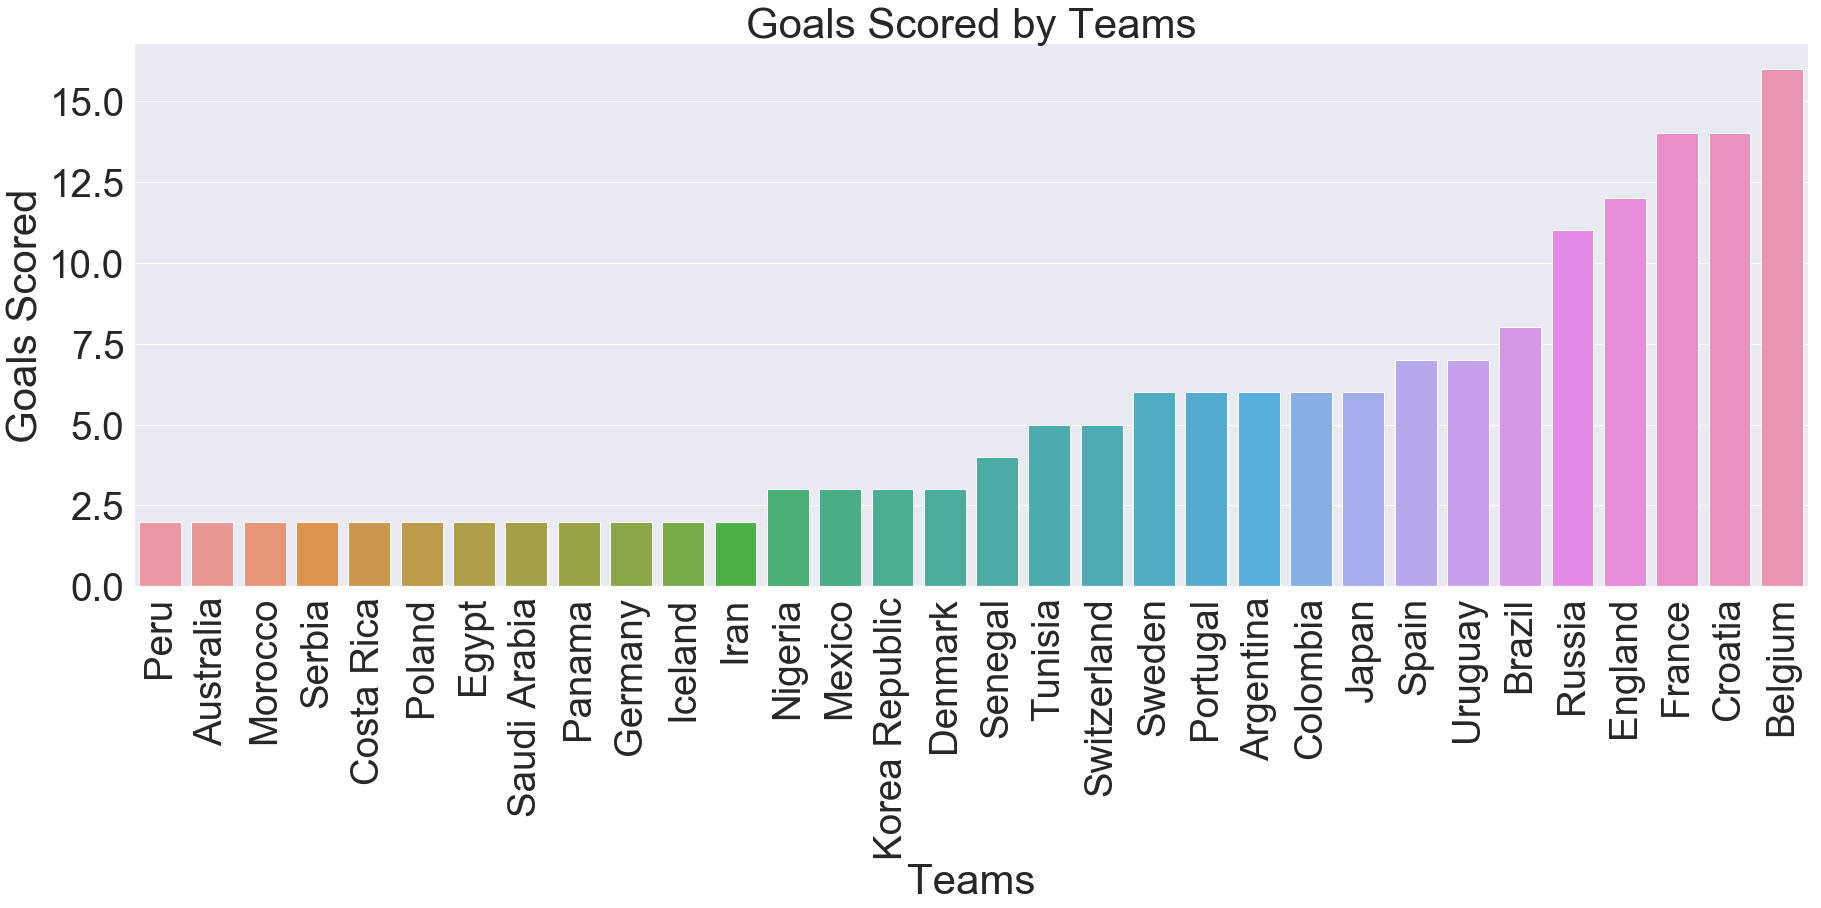

In [60]:
plt.figure(figsize = (30,10))
Goals_sorted_sum = data_file.groupby('Team')['Goal Scored'].sum().reset_index().sort_values(by=('Goal Scored'), ascending=True)

sns.set(font_scale=3.5)
plot1 = sns.barplot(x='Team', y='Goal Scored', data=Goals_sorted_sum)

plot1.set_xticklabels(Goals_sorted_sum['Team'], rotation=90, ha="center")
plot1.set(xlabel='Teams',ylabel='Goals Scored')
plot1.set_title('Goals Scored by Teams')
plt.show()

The maximum number of goals scored were by Belgium. 

#### Features Distribution

In [61]:
def plot_cols(arr):
    plt.figure(figsize=(40,40))
    for i in range(len(arr)):
        plt.subplot(4,3,i+1)
        plt.title(arr[i])
        data_file[data_file['Result']==1][arr[i]].plot(kind='kde',legend=True,label='wins')
        data_file[data_file['Result']==-1][arr[i]].plot(kind='kde',legend=True,label='losses')
        data_file[data_file['Result']==0][arr[i]].plot(kind='kde',legend=True,label='draws')
        

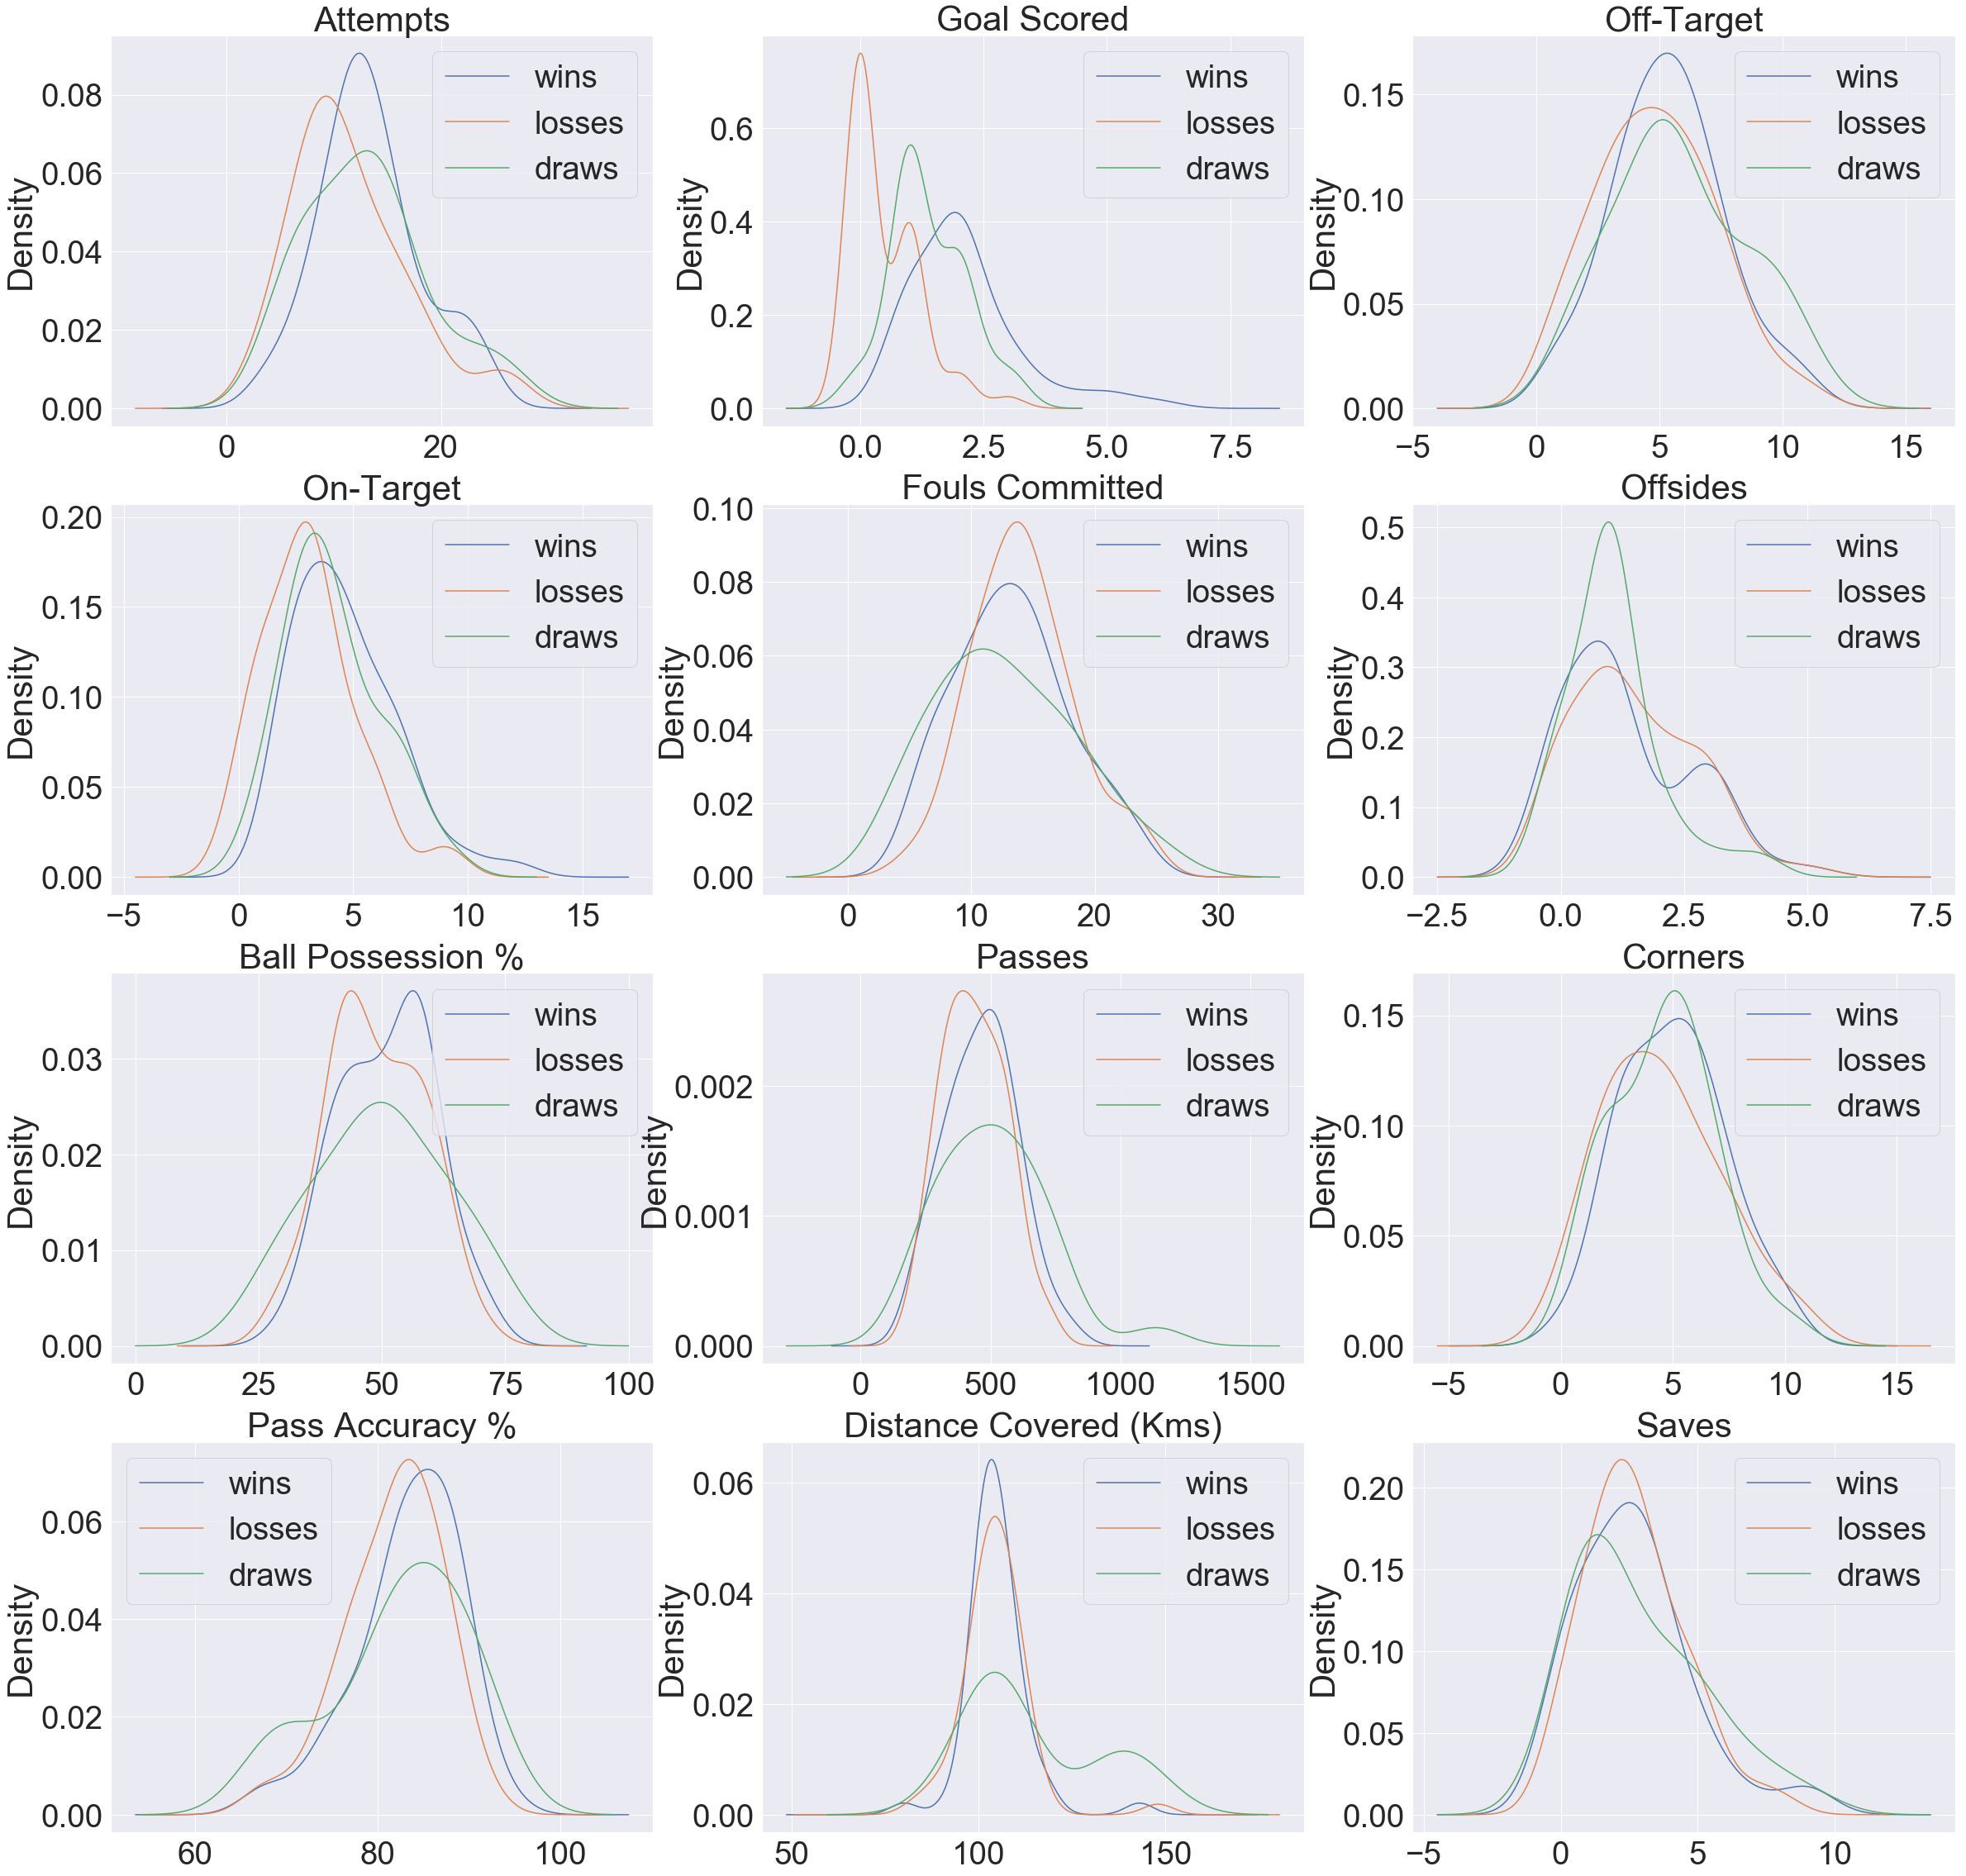

In [62]:
plot_cols(['Attempts', 'Goal Scored', 'Off-Target', 'On-Target', 'Fouls Committed', 'Offsides', 'Ball Possession %', 'Passes','Corners','Pass Accuracy %','Distance Covered (Kms)','Saves'])

From the above distribution it is seen that Teams which have won have more Attempts, Off-Targets, Pass Accuracy, Saves. 

## Bivariate Analysis
### Correllation Plot

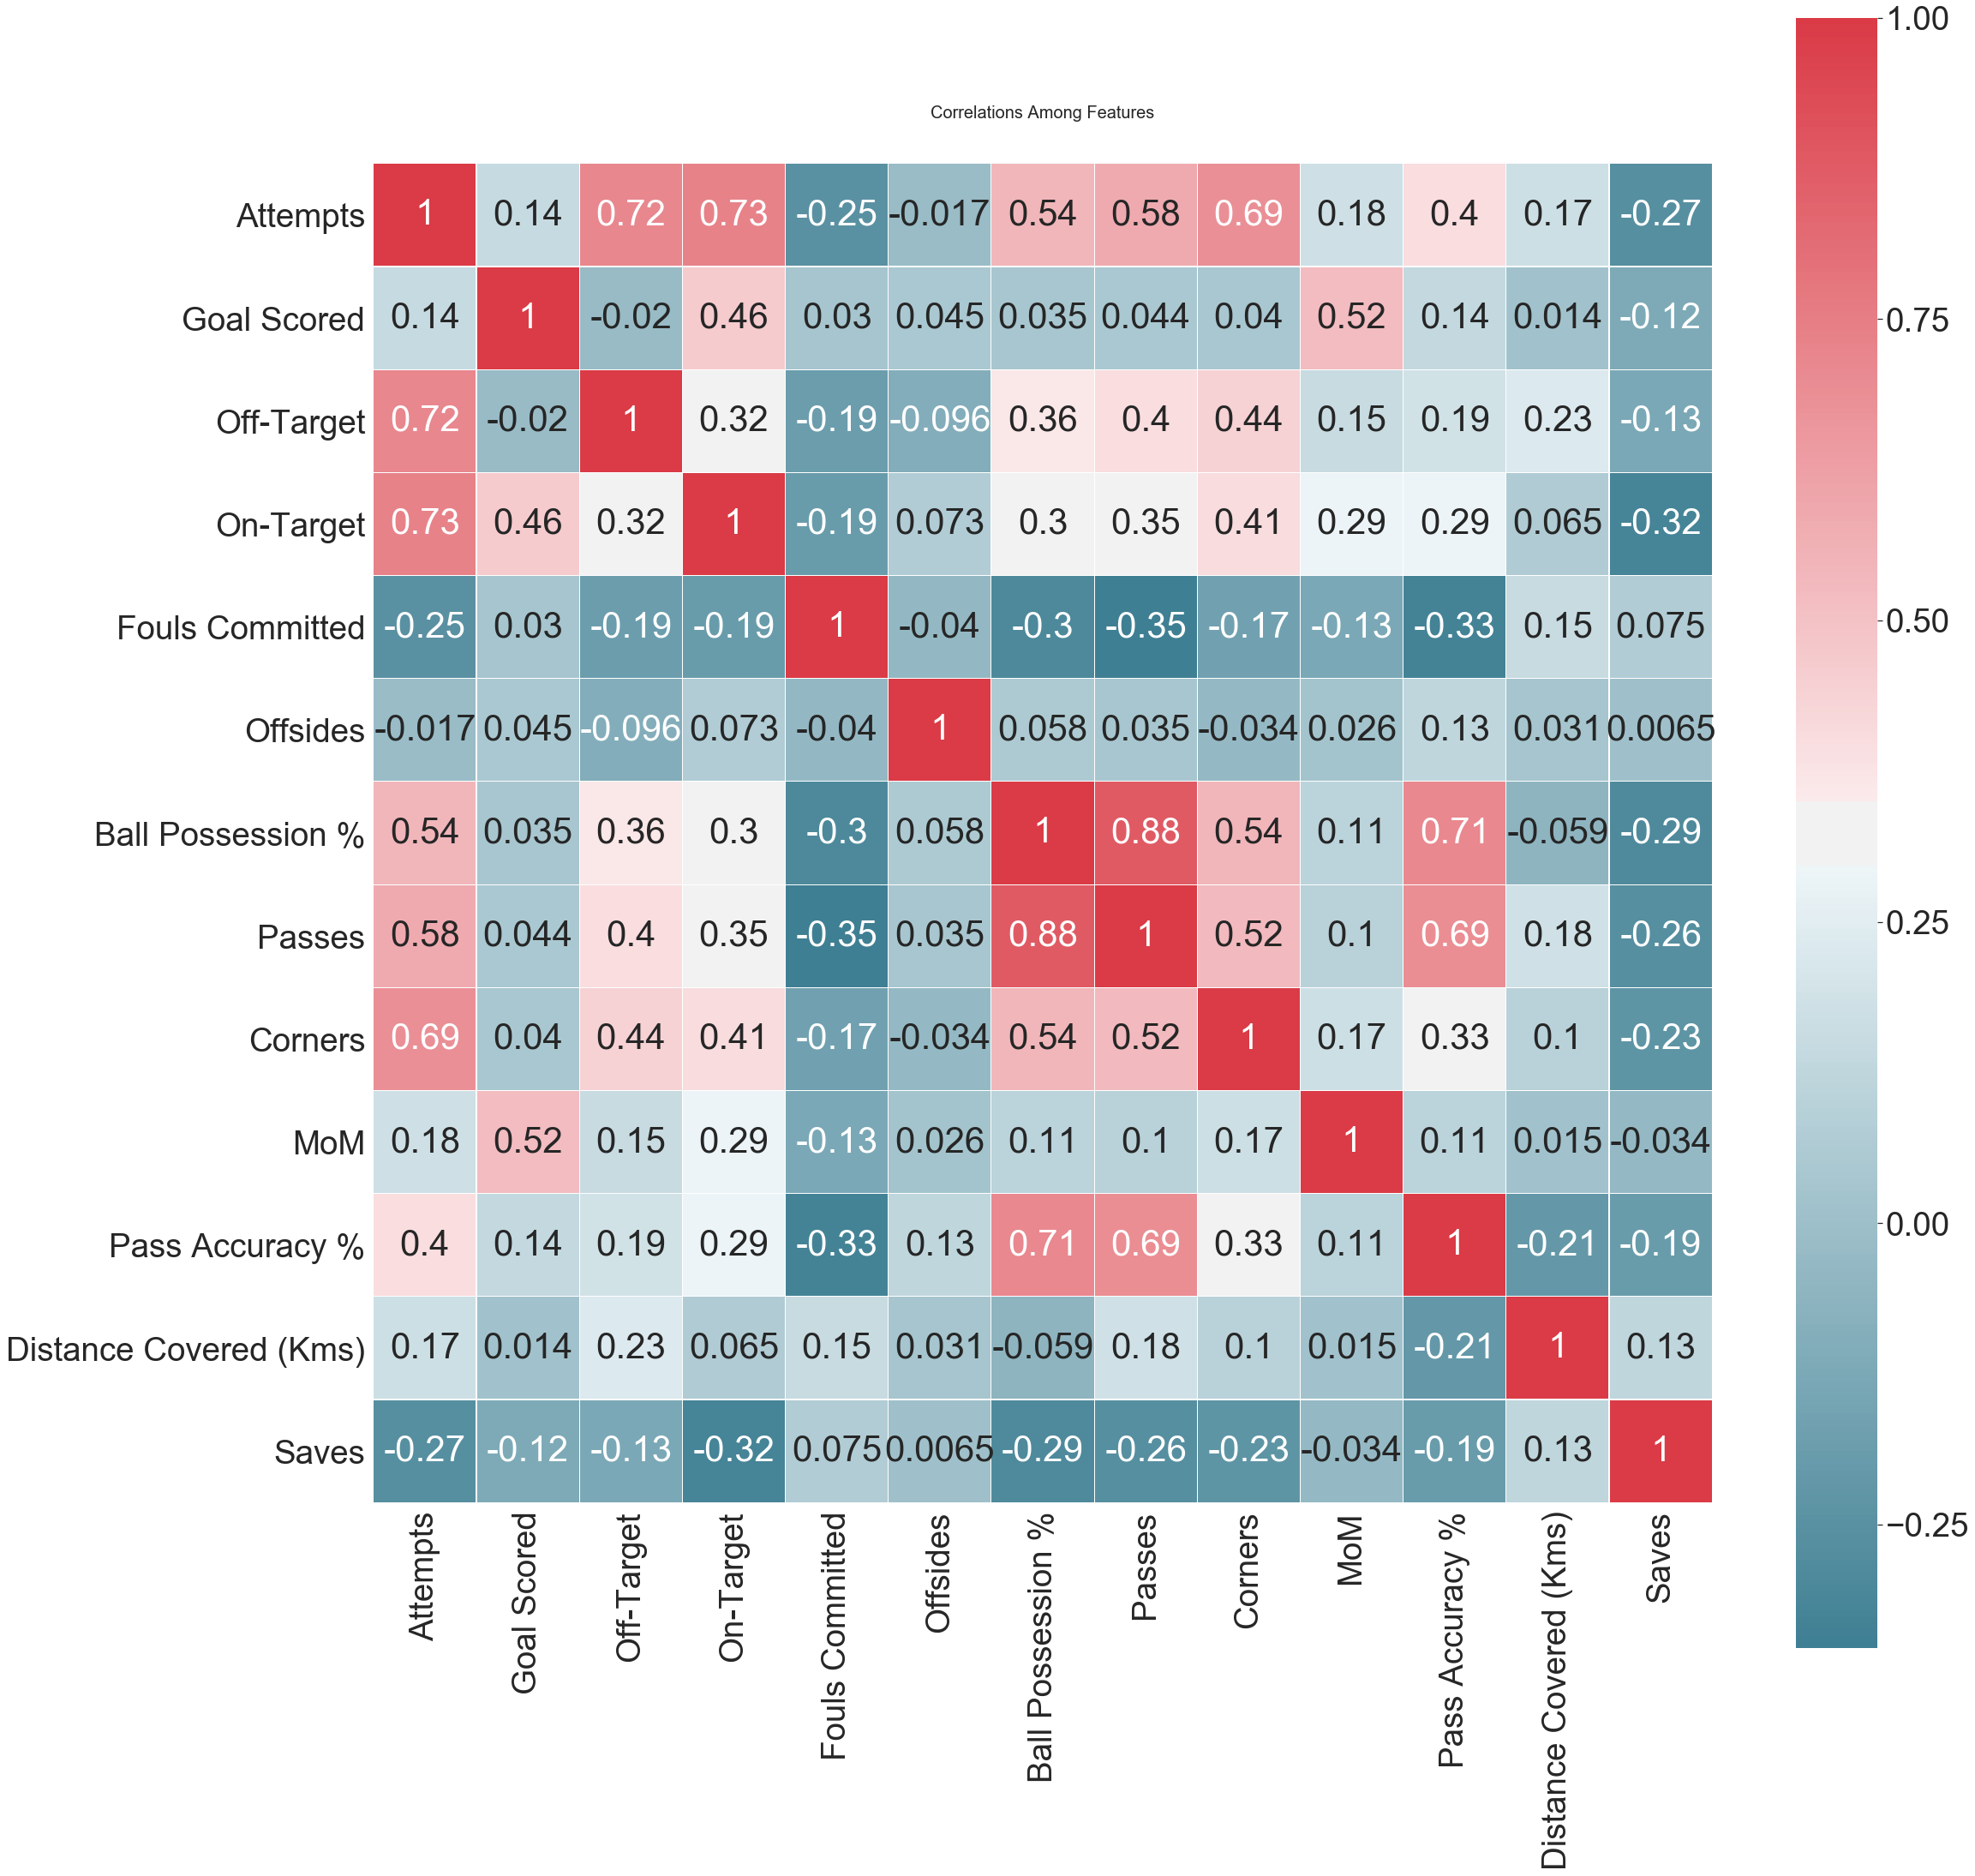

In [63]:
sub = ['Attempts', 'Goal Scored', 'Off-Target', 'On-Target', 'Fouls Committed', 'Offsides', 'Ball Possession %', 'Passes','Corners','MoM','Pass Accuracy %','Distance Covered (Kms)','Saves']
data = data_file[sub]
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.set(font_scale=3.5)
plt.subplots(figsize = (35,35))
sns.heatmap(data.corr(), 
            annot=True,
            cmap = cmap,
            linewidths=0.1, 
            linecolor='white',
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20)
plt.show()

From the Heat Map above, it can be inferred that: 

There is a correlation between **Ball Possession and Passes**. This is true as the more number of passes made by a team means that the ball is in their possession.

There is a correlation between **Number of Attempts and number of On-Target and Off-Target shots**. This correlation seems logical, the more number of attempts at scoring a goal will lead to more number of shots.

**Ball Possession and Pass Accuracy %** also seems to have a correlation as if the team has more possession of the ball they seem to have passed the ball more. More passes will obviously lead to higher Pass Accuracy %.

There also seems to be a correlation between **number of attempts and number of off-targets and on-targets** but those are similar so we discount that inference.

There seems to be a relation between **Ball Possession and Pass Accuracy**.

There is a correlation between **number of attempts and Corners**. This seems logical as a corner kick is the method of restarting play when the ball goes out of play over the goal line, without a goal being scored, and having last been touched by a member of the defending team. The kick is taken from the corner of the field of play nearest to where it went out. So if attempts were made which weren't successful then it would lead to more number of corner kicks.





### Relationship Between Ball Possession % and Passes

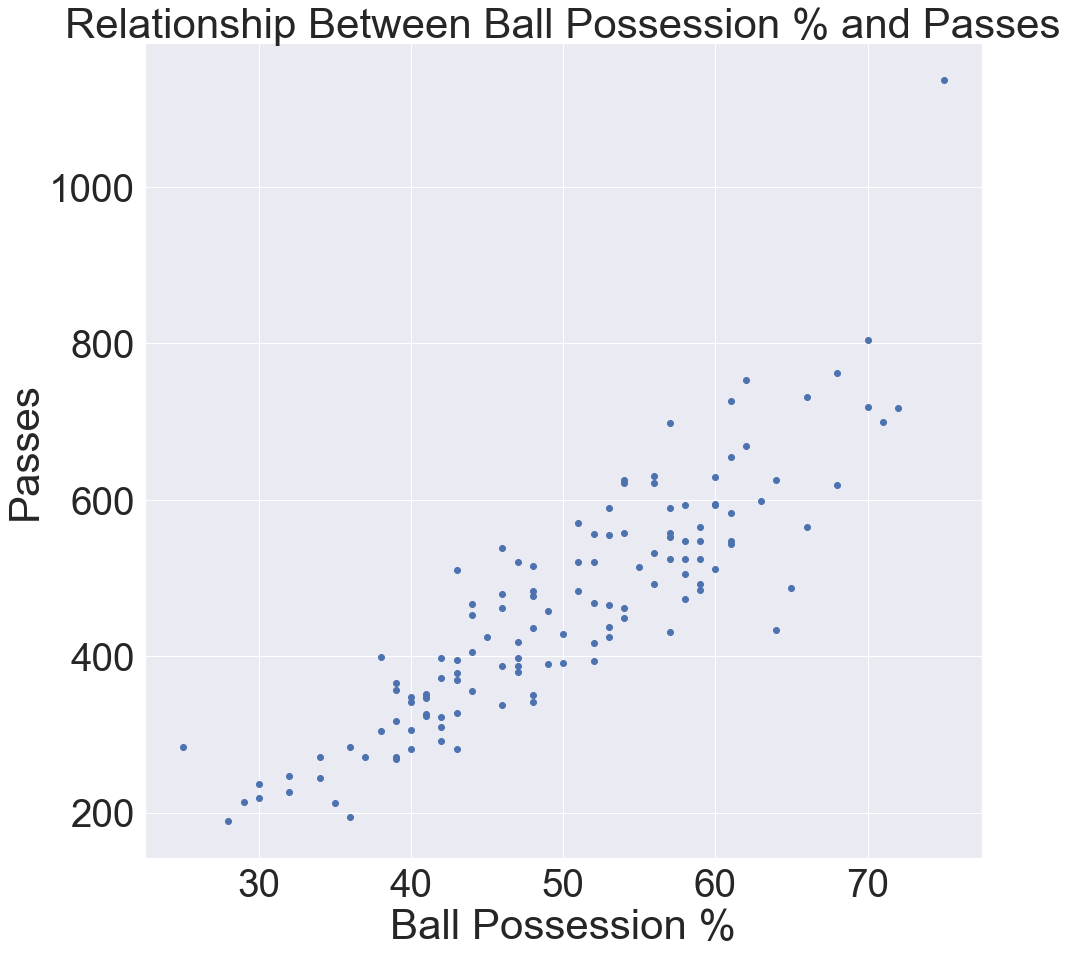

In [64]:
plt.figure(figsize = (15,15))
plt.scatter(x="Ball Possession %", y="Passes", data=data_file)
plt.xlabel("Ball Possession %")
plt.ylabel("Passes")
plt.title('Relationship Between Ball Possession % and Passes')
plt.show()

**The above scatter plot shows a very clean linear relationship between Ball Possession % and Passes. Thus, this hypothesis is validated. As the more number of passes made by a team means that the ball is in their possession.**

### Relationship between Attempts and Corners

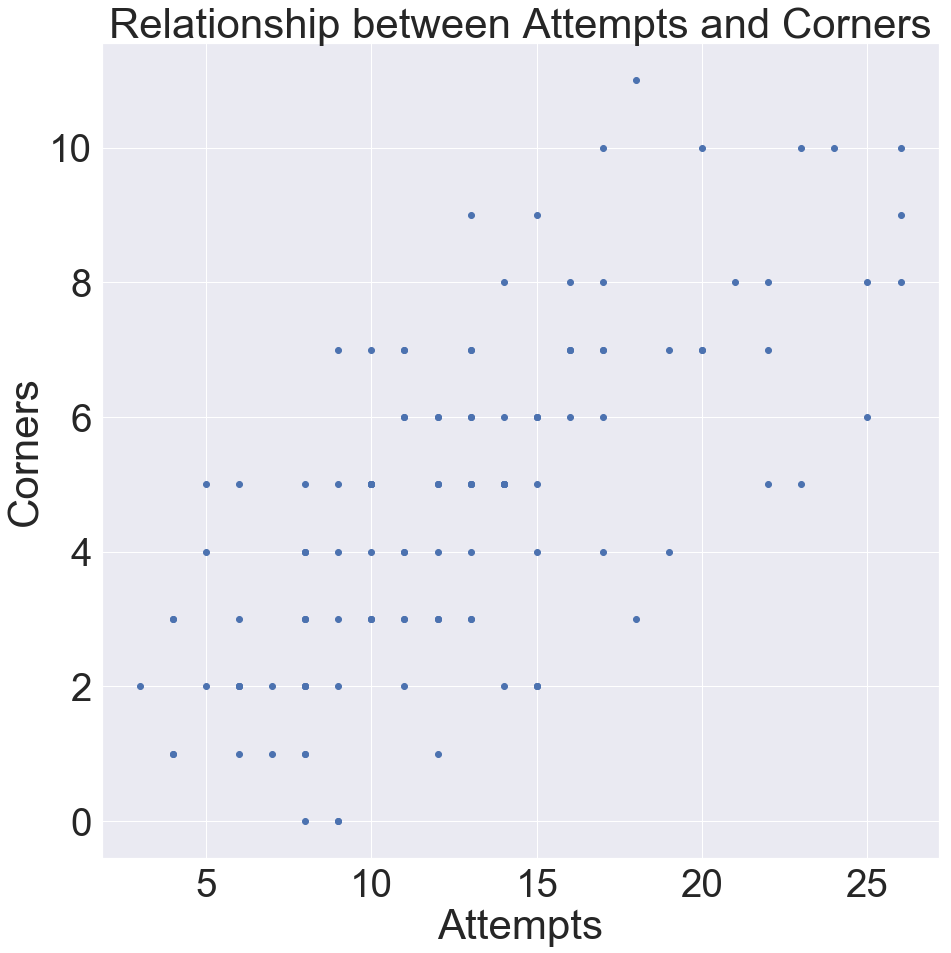

In [65]:
plt.figure(figsize = (15,15))
plt.scatter(x="Attempts", y="Corners", data=data_file)
plt.xlabel("Attempts")
plt.ylabel("Corners")
plt.title("Relationship between Attempts and Corners")
plt.show()

**This scatter plot is not very clean this shows high variance but both the features do have a linear relationship.**

### Fair Play
Penalty Cards received by players of each team.
A Yellow Card is received by a player in order to discipline them.
Receival of two yellow cards in one game leads to the receival of a Red Card, which dismisses the player from the field for the remaining match and may ban them from playing the subsequent match.

#### Total Yellow Cards Received

Text(0.5,1,'Total yellow cards')

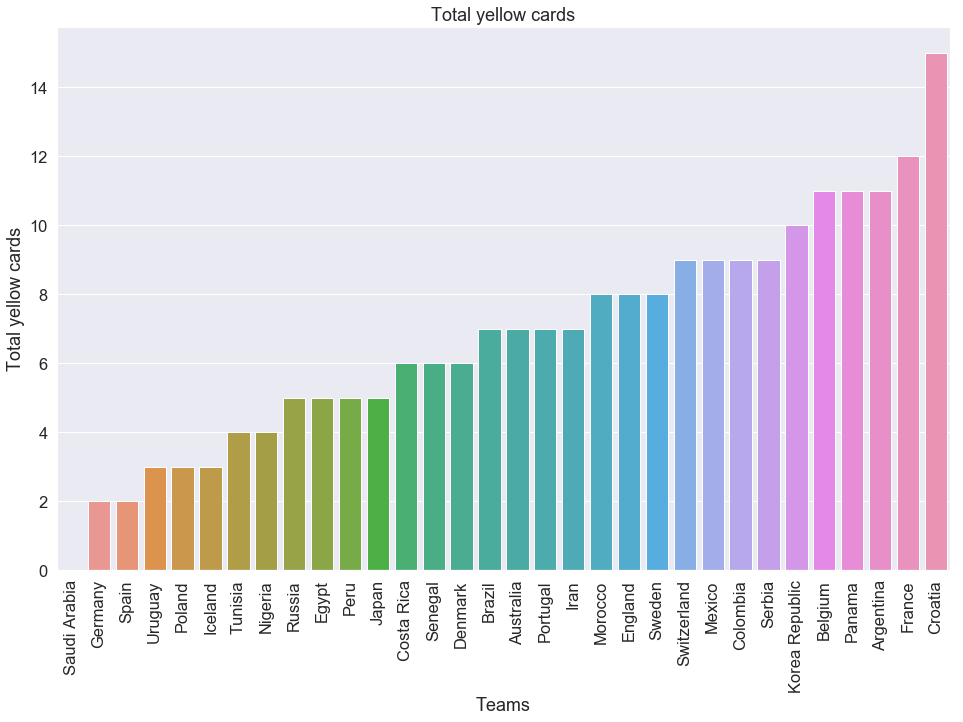

In [66]:
yellow_cards_data = data_file.groupby('Team')['Yellow Card'].sum().reset_index().sort_values(by=('Yellow Card'), ascending=True)

plt.figure(figsize = (16, 10), facecolor = None)
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plot1 = sns.barplot(x="Team", y="Yellow Card", data=yellow_cards_data)

plot1.set_xticklabels(yellow_cards_data['Team'], rotation=90, ha="center")
plot1.set(xlabel='Teams',ylabel='Total yellow cards')
plot1.set_title('Total yellow cards')

#### Total Red Cards Received
As was seen from the initial data analysis. Only players from two teams have received Red Cards these are Columbia and Switzerland. They both got 1 red card each.

### Univariate Analysis

Total Man of the Match won by each team

Text(0.5,1,'Most Man of the Match awards')

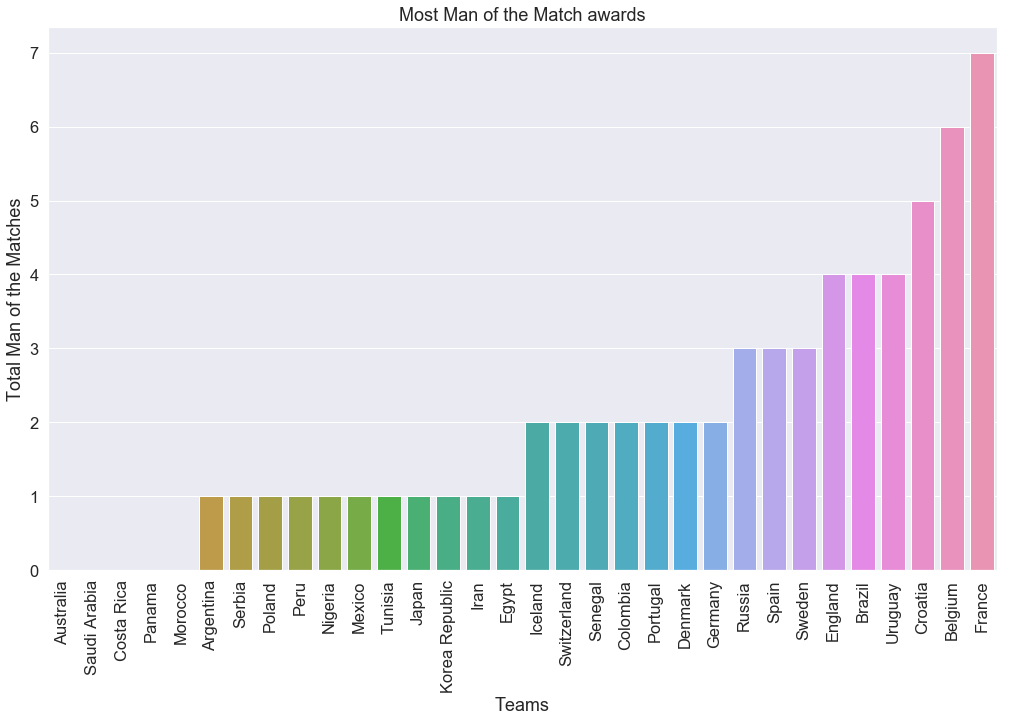

In [67]:
mom_data = data_file.groupby('Team')['MoM'].sum().reset_index().sort_values(by=('MoM'),ascending=True)

plt.figure(figsize = (17, 10), facecolor = None)
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plot1 = sns.barplot(x="Team", y="MoM", data=mom_data)

plot1.set_xticklabels(mom_data['Team'], rotation=90, ha="center")
plot1.set(xlabel='Teams',ylabel='Total Man of the Matches')
plot1.set_title('Most Man of the Match awards')

Here it can be seen that Australia, Saudi Arabia,  Costa Rica, Panama and Morocco have won zero Man of the Match awards. Most were won by France, the team which eventually went onto win the world cup.

### RADAR CHART
This chart compares the performace of the two finalists: France and Croatia, throughout the tournament.

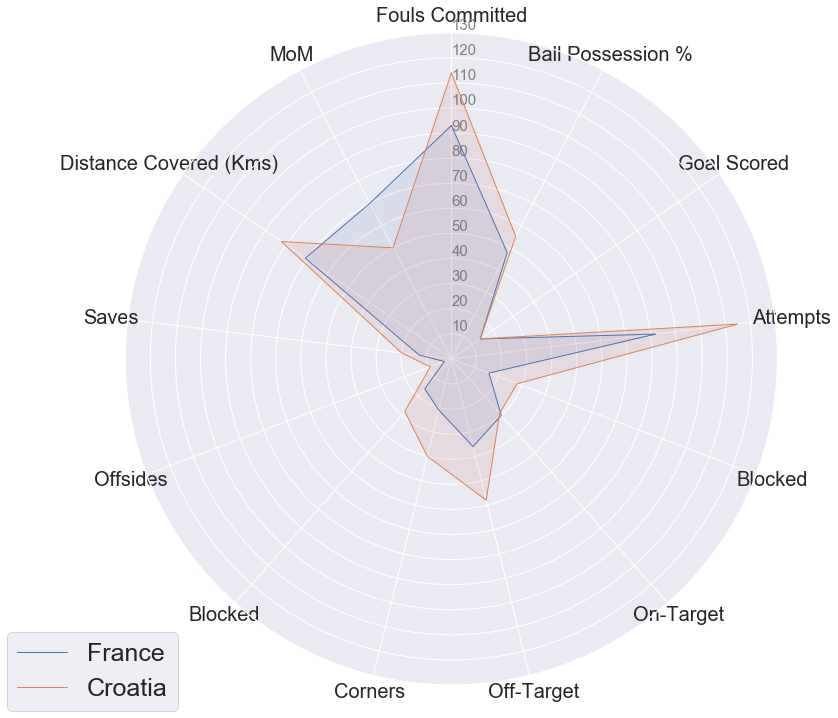

In [68]:
from math import pi

categories=np.array(['Fouls Committed', 'Ball Possession %', 'Goal Scored', 'Attempts', 'Blocked', 'On-Target', 'Off-Target', 'Corners', 'Blocked', 'Offsides', 'Saves', 'Distance Covered (Kms)', 'MoM'])
features_cumulative = data_file.groupby('Team')['Fouls Committed', 'Ball Possession %', 'Goal Scored', 'Attempts', 'Blocked', 'On-Target', 'Off-Target', 'Corners', 'Offsides', 'Saves', 'Distance Covered (Kms)', 'MoM'].sum().reset_index()

features_cumulative['Distance Covered (Kms)'] = features_cumulative['Distance Covered (Kms)']/10
data_file.groupby('Team').count()
features_cumulative['Ball Possession %'] = features_cumulative['Ball Possession %']/7
features_cumulative['MoM']=features_cumulative['MoM']*10

stats=features_cumulative.loc[10,categories].values 
stats=np.concatenate((stats,[stats[0]]))  #Closes the plot

# Setting an angle (we divide the plot / number of variable)
angles=np.linspace(0, 2*np.pi, len(categories), endpoint=False)   
angles=np.concatenate((angles,[angles[0]]))

# Initialising the radar plot
plot1 = plt.figure(figsize=(12, 12))
plot1 = plt.subplot(111, polar=True,)

plot1.set_theta_offset(pi / 2)
plot1.set_theta_direction(-1)
 
plt.xticks(angles[:], categories, size=20)
 
# Draw ylabels
plot1.set_rlabel_position(0)
plt.yticks([10,20,30, 40, 50, 60, 70 , 80 , 90 , 100, 110, 120, 130], ["10","20","30","40", "50", "60",  '70' , '80' , '90' , '100', '110', '120', '130'], color="grey", size=15)
plt.ylim(0,130)
 
#France plot
plot1.plot(angles, stats, linewidth=1, linestyle='solid', label="France")
plot1.fill(angles, stats, 'b', alpha=0.1)
 
#Croatia plot
stats=features_cumulative.loc[6,categories].values 
stats=np.concatenate((stats,[stats[0]]))
plot1.plot(angles, stats, linewidth=1, linestyle='solid', label="Croatia")
plot1.fill(angles, stats, 'r', alpha=0.1)  #alpha sets the opacity
 
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), prop={'size': 25})

** From this radar chart it can be observed that cummulatively Croatia committed more fouls than France.
Croatia also made more attempts and eventually scored more goals than France.
It seems Croatia played in an offensive manner while France played in a defensive manner. **



## Man of the Match Prediction


#### Encoding the Categorical Variables

In [69]:
data_file.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow & Red,Red,MoM,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time,Result
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,1,12.0,Group Stage,No,0,0.0,0.0,1.0
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,0.0,Group Stage,No,0,0.0,0.0,-1.0
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,0,0,0,0.0,Group Stage,No,0,0.0,0.0,-1.0
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,1,89.0,Group Stage,No,0,0.0,0.0,1.0
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,0,0,0,0.0,Group Stage,No,0,1.0,90.0,-1.0


In [70]:
Team = pd.get_dummies(data_file['Team'], prefix = 'Team', drop_first = True)
Opponent = pd.get_dummies(data_file['Opponent'], prefix = 'Opponent', drop_first = True)
Round = pd.get_dummies(data_file['Round'], prefix = 'Round', drop_first = True)
PSO = pd.get_dummies(data_file['PSO'], prefix = 'PSO', drop_first = True)

data_file.drop(['Team', 'Opponent', 'Round', 'PSO', 'Date'], inplace = True, axis = 1)
data_file = pd.concat([data_file,Team,Opponent, Round, PSO],axis=1)

In [71]:
data_file.head()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Opponent_Sweden,Opponent_Switzerland,Opponent_Tunisia,Opponent_Uruguay,Round_Final,Round_Group Stage,Round_Quarter Finals,Round_Round of 16,Round_Semi- Finals,PSO_Yes
0,5,40,13,7,3,3,6,3,11,0,...,0,0,0,0,0,1,0,0,0,0
1,0,60,6,0,3,3,2,1,25,2,...,0,0,0,0,0,1,0,0,0,0
2,0,43,8,3,3,2,0,1,7,3,...,0,0,0,1,0,1,0,0,0,0
3,1,57,14,4,6,4,5,1,13,3,...,0,0,0,0,0,1,0,0,0,0
4,0,64,13,3,6,4,5,0,14,2,...,0,0,0,0,0,1,0,0,0,0


### Features Importance
Using Permutation Importance
For this we follow these steps:
1. Get a trained model
2. Shuffle the values in a single column, make predictions using the resulting dataset. Use these predictions and the true target values to calculate how much the loss function suffered from shuffling. That performance deterioration measures the importance of the variable you just shuffled.
3. Return the data to the original order (undoing the shuffle from step 2 and repeat step 2 with the next column in the dataset, until we have calculated the importance of each column.

In [72]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, random_state=None)

# X is the feature set and y is the target
y = data_file['MoM']
X = data_file.drop('MoM', axis=1)
#feature_names = [i for i in data_NoMoM.columns if data_NoMoM[i].dtype in [np.int64]]
#X = data_NoMoM[feature_names]

for train_index, test_index in skf.split(X,y): 
    #print("Train:", train_index, "Test:", test_index) 
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


In [73]:
'''THIS PART HAS BEEN COMMENTED OUT SINCE THE NOTEBOOK WAS INITIALLY MADE AS A KAGGLE KERNEL ON WHICH ELI5 PACKAGE
WAS WORKING, BUT TO UPLOAD IT ON GITHUB IT HAD TO BE DOWNLOADED AND RUN AS A JUPYTER NOTEBOOK AT THE TIME I HAD
PYTHON 3.7 AND ELI5 WAS NOT SUPPORTED ON PYTHON 3.7'''
#from sklearn.tree import DecisionTreeClassifier

#DTree_Model = DecisionTreeClassifier()
#DTree_Model.fit(X_train, y_train)

#import eli5
#from eli5.sklearn import PermutationImportance

#perm = PermutationImportance(DTree_Model, random_state=1).fit(X_test, y_test)
#eli5.show_weights(perm, feature_names = X_test.columns.tolist())

'THIS PART HAS BEEN COMMENTED OUT SINCE THE NOTEBOOK WAS INITIALLY MADE AS A KAGGLE KERNEL ON WHICH ELI5 PACKAGE\nWAS WORKING, BUT TO UPLOAD IT ON GITHUB IT HAD TO BE DOWNLOADED AND RUN AS A JUPYTER NOTEBOOK AT THE TIME I HAD\nPYTHON 3.7 AND ELI5 WAS NOT SUPPORTED ON PYTHON 3.7'

ELI5 is a Python package which helps to debug machine learning classifiers and explain their predictions. 

The values towards the top are the most important features, and those towards the bottom matter least.

The first number in each row shows how much model performance decreased with a random shuffling. The number after the ± measures how performance varied from one-reshuffling to the next.

You'll occasionally see negative values for permutation importances. In those cases, the predictions on the shuffled data happened to be more accurate than the real data. This happens when the feature didn't matter (should have had an importance close to 0), but random chance caused the predictions on shuffled data to be more accurate. 

Here the Goal Scored is the most important feature, and that seems logical.


## Using Machine Learning Models to Predict Man of the Match

### Data Preparation
Data has already been split into Training and Test sets using stratified k-fold cross validation.

### Using The Decision Tree Classifier

Decision tree is a type of supervised learning algorithm.
It works for both categorical and continuous input and output variables. In this technique, we split the sample into two or more homogeneous sets based on most significant splitter / differentiator in input variables.

A decision tree is drawn upside down with its root at the top. An internal node is actually a condition based on which the tree splits into branches/ edges. The end of the branch that doesn’t split anymore is the decision/leaf.

In [74]:
DTree_Model = DecisionTreeClassifier()
DTree_Model.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=DTree_Model, X=X_train, y=y_train, cv=10)
dt_model_accuracy = accuracies.mean()
dt_model_standard_deviation = accuracies.std()
print("model accuracy", dt_model_accuracy)
print("model standard deviation", dt_model_standard_deviation)

model accuracy 0.7
model standard deviation 0.17748239349298847


In [75]:
confusion_matrix(y_test, DTree_Model.predict(X_test))

array([[9, 3],
       [3, 9]])

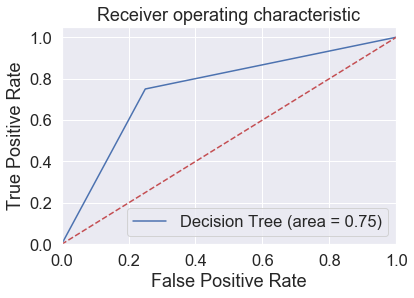

In [76]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

area_under_curve = roc_auc_score(y_test, DTree_Model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, DTree_Model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

Recall : Proportion of correct positive classification (True positives) from cases that are actually positive. <br>
Recall = TP/(TP+FN) = True Positive/ Actual Positives<br>
<br>
Precision : Proportion of correct positive classification (True positives) from cases that are predicted as positive. <br>
Precision = TP/(TP+FP) = True Positive/ Predicted Positives <br>
<br>
F1-Score : The F1 score conveys the balance between the precision and the recall. It tells you how precise your classifier is (how many instances it classifies correctly), as well as how robust it is (it does not miss a significant number of instances).<br>
F1-Score = 2x((precision x recall)/(precision+recall))



In [77]:
from sklearn import metrics
predicted = DTree_Model.predict(X_test)
print(metrics.classification_report(y_test, predicted))

             precision    recall  f1-score   support

          0       0.75      0.75      0.75        12
          1       0.75      0.75      0.75        12

avg / total       0.75      0.75      0.75        24



### Using The Random Forest Classifier

Random Forest is a supervised learning algorithm. It is an ensemble of Decision Trees. It uses the bagging method which is that a combination of learning models increases the overall result.


In [78]:
RForest_Model = RandomForestClassifier()
RForest_Model.fit(X_train, y_train)

accuracies = cross_val_score(estimator=RForest_Model, X=X_train, y=y_train, cv=10)
rf_model_accuracy = accuracies.mean()
rf_model_standard_deviation = accuracies.std()
print("model accuracy", rf_model_accuracy)
print("model standard deviation", rf_model_standard_deviation)

model accuracy 0.7766666666666666
model standard deviation 0.14165686240583852


In [79]:
confusion_matrix(y_test, RForest_Model.predict(X_test))

array([[10,  2],
       [ 0, 12]])

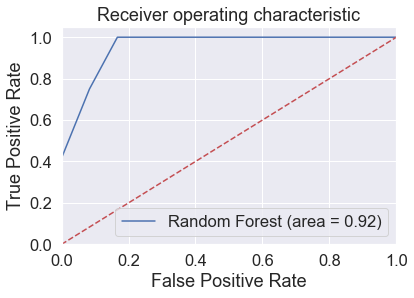

In [80]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

area_under_curve = roc_auc_score(y_test, RForest_Model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, RForest_Model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [81]:
from sklearn import metrics
predicted = RForest_Model.predict(X_test)
print(metrics.classification_report(y_test, predicted))

             precision    recall  f1-score   support

          0       1.00      0.83      0.91        12
          1       0.86      1.00      0.92        12

avg / total       0.93      0.92      0.92        24



### Using The Gradient Boosting Classifier

The idea of boosting came out of the idea of whether a weak learner can be modified to become better.
A weak hypothesis or weak learner is defined as one whose performance is at least slightly better than random chance.

We go through cycles that repeatedly builds new models and combines them into an ensemble model. We start the cycle by calculating the errors for each observation in the dataset. We then build a new model to predict those. We add predictions from this error-predicting model to the "ensemble of models."

To make a prediction, we add the predictions from all previous models. We can use these predictions to calculate new errors, build the next model, and add it to the ensemble.



In [82]:
from xgboost import XGBClassifier
GBoost_Model = XGBClassifier(learning_rate = 0.05, n_estimators= 100, max_depth = 4)
GBoost_Model.fit(X_train, y_train)

accuracies = cross_val_score(estimator=GBoost_Model, X=X_train, y=y_train, cv=10)
xgb_model_accuracy = accuracies.mean()
xgb_model_standard_deviation = accuracies.std()
print("model accuracy", xgb_model_accuracy)
print("model standard deviation", xgb_model_standard_deviation)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

model accuracy 0.8166666666666667
model standard deviation 0.14259499757471625


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [83]:
confusion_matrix(y_test, GBoost_Model.predict(X_test))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([[11,  1],
       [ 0, 12]])

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


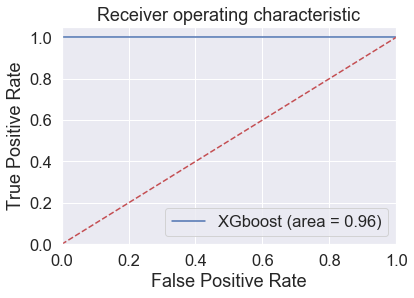

In [84]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

area_under_curve = roc_auc_score(y_test, GBoost_Model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, GBoost_Model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGboost (area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [85]:
from sklearn import metrics
predicted = GBoost_Model.predict(X_test)
print(metrics.classification_report(y_test, predicted))

             precision    recall  f1-score   support

          0       1.00      0.92      0.96        12
          1       0.92      1.00      0.96        12

avg / total       0.96      0.96      0.96        24



/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Using SVC

-SVM can be used to do binary classification <br>
-SVM finds a hyper-plane (line in 2d, plane in 3d, etc) that separates its training data in such a way that the distance between the hyper plane and the closest points from each class is maximized. <br>
-once SVM finds this hyper-plane, you can classify new data points by seeing which side of this hyper-plane they land on <br>
-SVM can only be used on data that is linearly separable (i.e. a hyper-plane can be drawn between the two groups)

#### y = w<sup>T</sup> + b
y : classification label
w : parameters of the plane
b : moves hyperplane in and out of the origin

Hyperplane is also known as the decision boundary, it separates the two classes of data. While also having the property of being the most further away from both classes.
Equation for the hyperplane is <br>w<sup>T</sup> + b = 0
![](https://cdn-images-1.medium.com/max/1600/1*TudH6YvvH7-h5ZyF2dJV2w.jpeg)

In [86]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [87]:
X_train_scaled.head()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Opponent_Sweden,Opponent_Switzerland,Opponent_Tunisia,Opponent_Uruguay,Round_Final,Round_Group Stage,Round_Quarter Finals,Round_Round of 16,Round_Semi- Finals,PSO_Yes
0,3.136183,-0.921928,0.157641,1.454606,-0.894555,-0.085744,0.612664,1.249411,-0.866322,-1.341879,...,-0.172345,-0.172345,-0.172345,-0.2,0.0,0.288675,0.0,-0.288675,0.0,-0.2
1,-1.110732,0.921928,-1.192511,-1.754343,-0.894555,-0.085744,-1.064101,-0.354771,2.210177,-0.326930,...,-0.172345,-0.172345,-0.172345,-0.2,0.0,0.288675,0.0,-0.288675,0.0,-0.2
2,-1.110732,-0.645349,-0.806753,-0.379079,-0.894555,-0.510383,-1.902484,-0.354771,-1.745321,0.180544,...,-0.172345,-0.172345,-0.172345,5.0,0.0,0.288675,0.0,-0.288675,0.0,-0.2
3,-0.261349,0.645349,0.350520,0.079342,0.385726,0.338894,0.193473,-0.354771,-0.426822,0.180544,...,-0.172345,-0.172345,-0.172345,-0.2,0.0,0.288675,0.0,-0.288675,0.0,-0.2
4,-1.110732,1.290699,0.157641,-0.379079,0.385726,0.338894,0.193473,-1.156862,-0.207072,-0.326930,...,-0.172345,-0.172345,-0.172345,-0.2,0.0,0.288675,0.0,-0.288675,0.0,-0.2


In [88]:
from sklearn.svm import SVC
svc_cls = SVC()
svc_cls.fit(X_train_scaled, y_train)
svc_accuracy = accuracy_score(y_test, svc_cls.predict(X_test_scaled))
print('accuracy score', svc_accuracy)

accuracy score 0.9166666666666666


In [89]:
print('confusion matrix')
print(confusion_matrix(y_test, svc_cls.predict(X_test_scaled)))

confusion matrix
[[12  0]
 [ 2 10]]


In [90]:
from sklearn import metrics
predicted = svc_cls.predict(X_test_scaled)
print(metrics.classification_report(y_test, predicted))

             precision    recall  f1-score   support

          0       0.86      1.00      0.92        12
          1       1.00      0.83      0.91        12

avg / total       0.93      0.92      0.92        24



### Plotting the Accuracy Percentage of all the Classifiers

Accuracy for Decision Tree 70.0
Accuracy for Random Forest 77.66666666666666
Accuracy for Gradient Boost Classifier 81.66666666666667
Accuracy for Support Vector Classifier 91.66666666666666


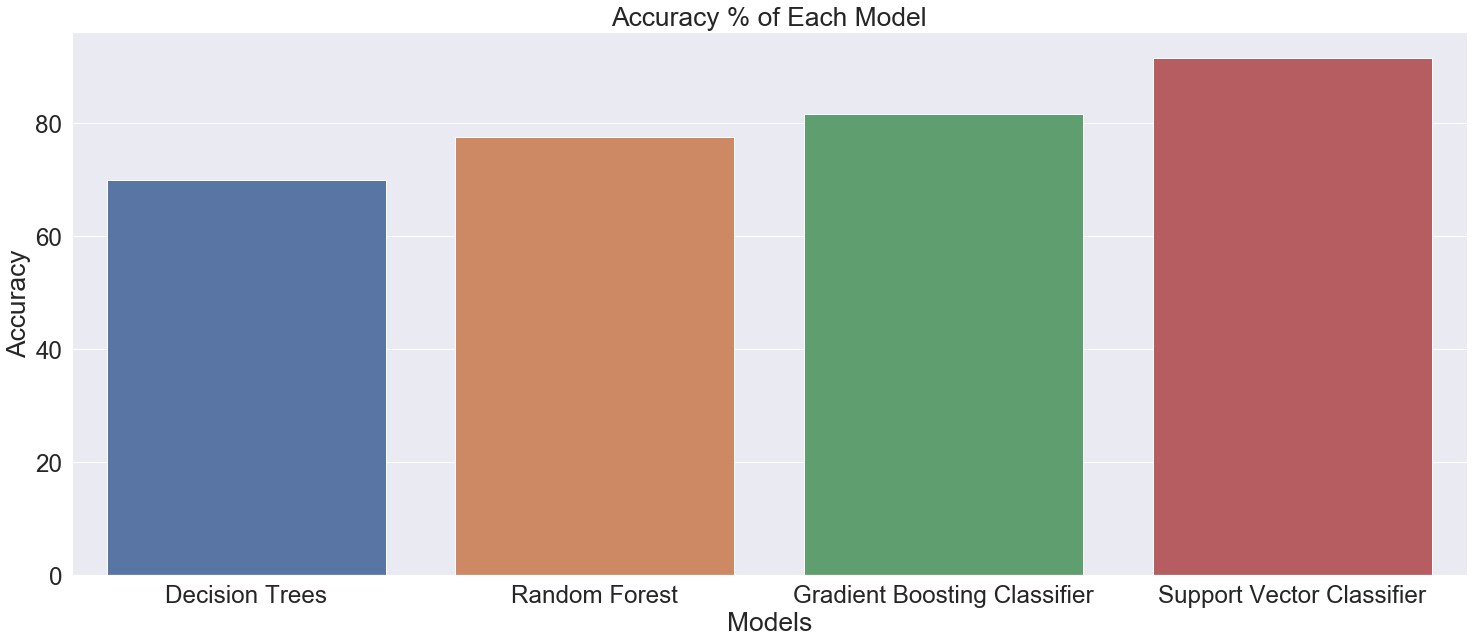

In [91]:
plt.figure(figsize = (25,10))

arr = np.array((dt_model_accuracy*100))
arr = np.append(arr, (rf_model_accuracy*100))
arr = np.append(arr, (xgb_model_accuracy*100))
arr = np.append(arr, (svc_accuracy*100))
ser = pd.Series(arr)
print('Accuracy for Decision Tree', arr[0])
print('Accuracy for Random Forest', arr[1])
print('Accuracy for Gradient Boost Classifier', arr[2])
print('Accuracy for Support Vector Classifier', arr[3])

sns.set(font_scale=2.2)
sns.set_style("darkgrid")
Models_labels = ['Decision Trees', 'Random Forest', 'Gradient Boosting Classifier', 'Support Vector Classifier']
plot1 = sns.barplot(x=Models_labels, y=ser)

plot1.set_xticklabels(Models_labels, ha="center")
plot1.set(xlabel='Models',ylabel='Accuracy')
plot1.set_title('Accuracy % of Each Model')
plt.show()